# ANN Model for MNIST dataset
----
I used `torchvision datasets` for import MNIST dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets,transforms

%matplotlib inline

### Dataset
Load MNIST from `torchvision datasets` and if it is not in memory download it. It is by default `splited` 

In [2]:
# download datasets
train_data = datasets.MNIST(
    root='data',
    train = True,
    download=True,
    transform=transforms.ToTensor())

test_data = datasets.MNIST(
    root='data',
    train = False,
    download=True,
    transform=transforms.ToTensor())

get information from dataset

In [3]:
# print information of datasets
print("train data: ", train_data, "\n\n")
print("test data: ", test_data)

train data:  Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 


test data:  Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


### Batching
We need to make batches. So, we use `DataLoader` for batching

In [4]:
# use DaraLoader for batching datasets
train_loader = DataLoader(train_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=test_data.targets.size()[0])

### Ploting some of datas

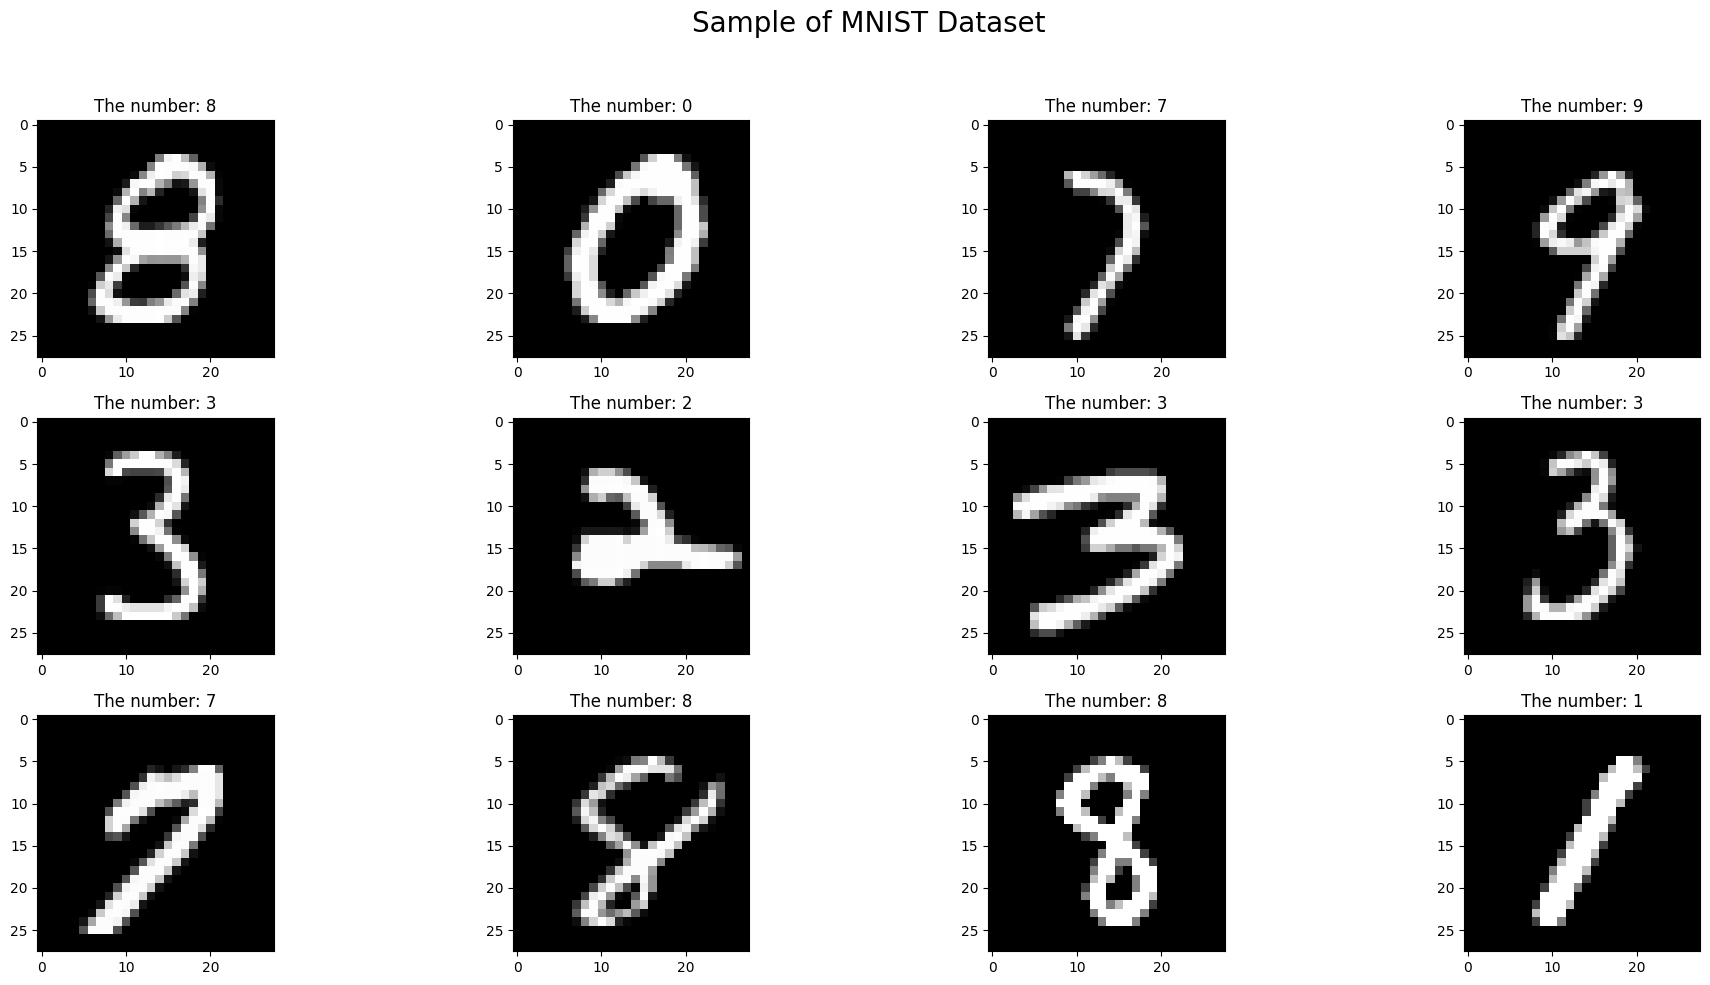

In [5]:
# schow 12 randomly iamges
fig,axs = plt.subplots(3,4,figsize=(20,10))
for ax in axs.flatten():
  # pick a random image
  random_index = np.random.randint(0,high=train_data.targets.size(0))
  img, label = train_data[random_index]
  ax.imshow(img.numpy()[0], cmap='gray')
  ax.set_title(f'The number: {label}')

plt.suptitle('Sample of MNIST Dataset',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

In [6]:
print("Size of data: ", train_data.data.size())
print("Size of target: ", train_data.targets.size())

Size of data:  torch.Size([60000, 28, 28])
Size of target:  torch.Size([60000])


### Creat ANN Model for MNIST Dataset

In [7]:
# create ANN model for MNIST 
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(784, 64)
        
        self.hidden_layer_01 = nn.Linear(64,64)
        self.hidden_layer_02 = nn.Linear(64,32)
        
        self.output = nn.Linear(32,10)
        
    def forward(self, x):
        x = torch.flatten(x, start_dim=1) # Because data shape is (28*28) for ANN must at first flatten
        x = F.relu(self.input(x))
        x = F.relu(self.hidden_layer_01(x))
        x = F.relu(self.hidden_layer_02(x))
        x = self.output(x)   
        return torch.log_softmax(x, axis=1) # We use NLLLoss function for this
        

In [13]:
# config model, loss function, and optimizer
net = Net()
loss = nn.NLLLoss() # Because we use log softmax at the end of Model
optimizer = torch.optim.Adam(net.parameters(), lr=1e-5)

In [14]:
# train function 
def train(epoch):
    train_accuracy  = []
    test_accuracy = []
    losses  = torch.zeros(epoch)
    
    for epochi in range(epoch):
        batch_accuracy  = []
        batch_loss = []
        
        # net.train()
        
        for X,y in train_loader:
            yHAT = net(X)
            lossfun = loss(yHAT, y)

            # 
            optimizer.zero_grad()
            lossfun.backward()
            optimizer.step()
            
            # Evaluate Metrics for this Batch
            batch_loss.append(lossfun.item())
            batch_accuracy.append( 100*torch.mean((torch.argmax(yHAT,axis=1) == y).float())) 
            
        # and get average losses across the batches
        losses[epochi] = np.mean(batch_loss)
        train_accuracy.append(np.mean(batch_accuracy))
        
        # net.eval()
        with torch.no_grad():
            X,y = next(iter(test_loader))
            yHAT = net(X)
            test_accuracy.append(100*torch.mean((torch.argmax(yHAT,axis=1) == y).float()))
            
        print("Epoch: {}, Loss:  {:.4f}, Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%".format(epochi + 1, losses[epochi].item(), train_accuracy[epochi], test_accuracy[epochi]))
        
    return net, losses, train_accuracy, test_accuracy

In [15]:
# train ANN model
net, losses, train_accuracy, test_accuracy = train(100)

Epoch: 1, Loss:  2.2073, Train Accuracy: 16.46%, Test Accuracy: 28.56%
Epoch: 2, Loss:  1.7364, Train Accuracy: 43.57%, Test Accuracy: 56.43%
Epoch: 3, Loss:  1.2534, Train Accuracy: 67.98%, Test Accuracy: 74.87%
Epoch: 4, Loss:  0.9432, Train Accuracy: 76.55%, Test Accuracy: 79.13%
Epoch: 5, Loss:  0.7759, Train Accuracy: 79.69%, Test Accuracy: 81.93%
Epoch: 6, Loss:  0.6739, Train Accuracy: 82.11%, Test Accuracy: 83.65%
Epoch: 7, Loss:  0.6037, Train Accuracy: 83.95%, Test Accuracy: 85.00%
Epoch: 8, Loss:  0.5521, Train Accuracy: 85.22%, Test Accuracy: 85.83%
Epoch: 9, Loss:  0.5127, Train Accuracy: 86.21%, Test Accuracy: 86.74%
Epoch: 10, Loss:  0.4819, Train Accuracy: 86.93%, Test Accuracy: 87.41%
Epoch: 11, Loss:  0.4574, Train Accuracy: 87.51%, Test Accuracy: 88.02%
Epoch: 12, Loss:  0.4374, Train Accuracy: 87.99%, Test Accuracy: 88.37%
Epoch: 13, Loss:  0.4206, Train Accuracy: 88.36%, Test Accuracy: 88.67%
Epoch: 14, Loss:  0.4062, Train Accuracy: 88.65%, Test Accuracy: 88.94%
E

In [16]:
net.eval()

images, labels = next(iter(test_loader))

print(images.shape)
print(labels.shape)

with torch.no_grad():
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    
    correct = (predicted == labels).sum().item()
    accuracy = 100 * correct/labels.size(0)
    print(f'Accuracy for this batch {accuracy}%')
    

torch.Size([10000, 1, 28, 28])
torch.Size([10000])
Accuracy for this batch 94.72%


Text(0.5, 0.98, 'ANN MNIST 200 epoch')

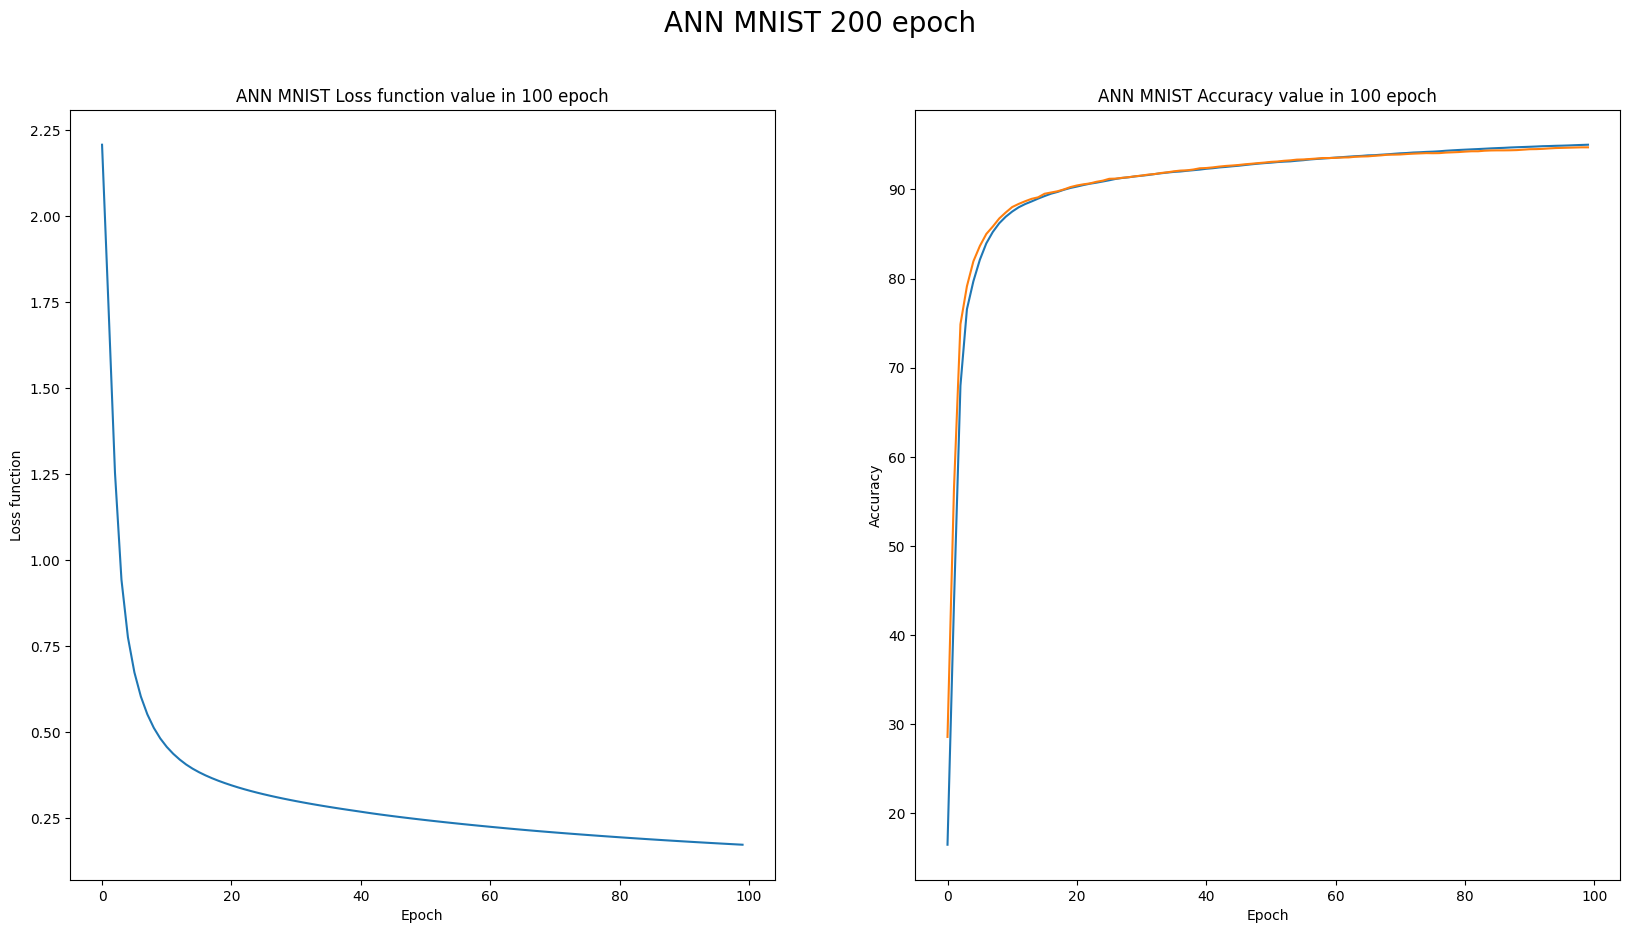

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].plot(losses)
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss function")
axs[0].set_title("ANN MNIST Loss function value in 100 epoch")

axs[1].plot(train_accuracy)
axs[1].plot(test_accuracy)
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("ANN MNIST Accuracy value in {} epoch".format(100))

plt.suptitle("ANN MNIST 200 epoch", fontsize=20)